In [ ]:
#supervised learning: when we know what category we're trying to predict
#binary classification: when what we're trying to predict is binary
#kneighborsclassifier: classifies observations based on most common classification of n nearest data points

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
len(churn_df)

3333

In [9]:
X = churn_df[["total_day_charge","total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [10]:
knn = KNeighborsClassifier(n_neighbors=15)

In [11]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [13]:
X_new = np.array([[56.8, 17.5],
        [24.4, 24.1],
        [50.1, 10.9]])
print(X_new.shape)

(3, 2)


In [29]:
y_new = knn.predict(X_new)
print("Predicted values: ",format(y_new))

Predicted values:  [1 0 0]


In [17]:
#usually split dataset into training and test dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#test size is the percent of data that will be used to test the model's accuracy, while the remaining percent is the training data
#random_state is an arbitrary number that splits the data, and using the same random_state replicates the exact split
#stratify is basically making a stratified sample (like we learned in stats), 
#so that our training and test data sets have roughly the same percentage of 1s and 0s in our labels column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [30]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [31]:
print(knn.score(X_test, y_test))

0.872


In [ ]:
#this is low
#has to do with how high/low our decision boundary is for our classifier model
#the larger n_neighbors, the "simpler" the model is, and the classifier is less able to detect relationships, leading to underfitting
#the smaller n_neighbors, the "more complex" the model is, and the classifier is hyper-sensitive to noise, leading to overfitting

In [32]:
#so let's figure out which n_neighbors (k) has the best accuracy
train_accuracies={}
test_accuracies={}
neighbors=np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

In [26]:
import matplotlib.pyplot as plt

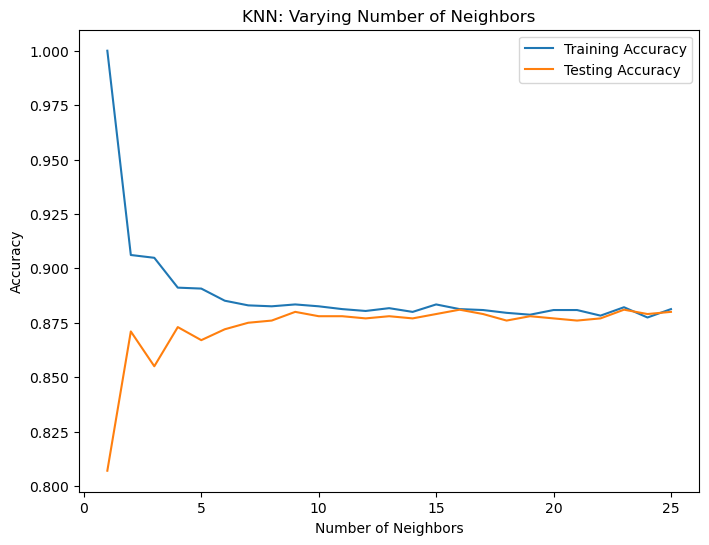

In [27]:
plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()